In [ ]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import pandas as pd
import seaborn as sns

In [ ]:
def refresh_dataset(): # this function will help in refreshing the dataset everytime we need to plot new diagrams
  df = pd.read_csv('/content/Datasets_Project_Final - Copy of Sheet2 (2).csv')
  return df

In [ ]:
df = refresh_dataset()

In [ ]:
df.dtypes

Blog                  object
Internal Links       float64
Mobile               float64
Headings             float64
Page Titles            int64
URL format           float64
Amount of Content    float64
Popularity           float64
Freshness            float64
Twitter              float64
Images               float64
Printability         float64
Meta Tags            float64
Server Behavior      float64
Analytics            float64
Overall              float64
dtype: object

In [ ]:
df.head(10)

,Blog,Internal Links,Mobile,Headings,Page Titles,URL format,Amount of Content,Popularity,Freshness,Twitter,Images,Printability,Meta Tags,Server Behavior,Analytics,Overall
0,https://www.healthline.com/nutrition/how-to-lo...,0.7,7.2,9.0,10,10.0,9.8,10.0,10.0,0.0,9.4,0.0,10.0,10.0,0.0,7.3
1,https://food.ndtv.com/health/how-to-lose-weigh...,9.2,8.6,9.0,10,3.6,9.6,2.9,10.0,10.0,4.7,0.0,10.0,10.0,10.0,8.5
2,https://www.wikihow.life/Lose-Weight-in-10-Days,8.6,10.0,10.0,10,10.0,8.4,7.7,10.0,0.0,9.9,10.0,8.4,9.8,0.0,8.5
3,https://www.stylecraze.com/articles/simple-tip...,9.3,10.0,10.0,10,10.0,9.1,9.5,10.0,10.0,8.0,10.0,10.0,10.0,0.0,9.0
4,https://www.livestrong.com/article/79644-lose-...,4.3,10.0,10.0,10,10.0,9.0,9.8,10.0,0.0,9.8,0.0,10.0,10.0,10.0,8.7
5,https://www.eatthis.com/how-to-lose-weight-wit...,0.0,10.0,9.0,10,8.8,9.5,10.0,10.0,10.0,8.2,10.0,8.4,10.0,10.0,8.5
6,https://medium.com/gethealthy/20-tips-to-lose-...,6.6,10.0,3.0,10,5.6,4.9,10.0,10.0,0.0,9.1,0.0,6.8,8.0,10.0,7.6
7,https://www.onlymyhealth.com/how-lose-weight-q...,9.6,7.2,9.0,9,10.0,9.6,8.4,10.0,9.7,10.0,0.0,10.0,9.7,10.0,9.1
8,https://www.healthifyme.com/blog/weight-loss-7...,6.1,10.0,7.0,10,10.0,8.4,8.5,10.0,9.7,9.8,6.0,8.4,10.0,10.0,9.0
9,https://ketosolutions.in/?gclid=EAIaIQobChMI2v...,8.9,10.0,10.0,10,8.0,8.7,6.2,10.0,0.0,10.0,6.7,7.3,7.4,6.7,8.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Blog               79 non-null     object 
 1   Internal Links     79 non-null     float64
 2   Mobile             79 non-null     float64
 3   Headings           79 non-null     float64
 4   Page Titles        79 non-null     int64  
 5   URL format         79 non-null     float64
 6   Amount of Content  79 non-null     float64
 7   Popularity         79 non-null     float64
 8   Freshness          79 non-null     float64
 9   Twitter            79 non-null     float64
 10  Images             79 non-null     float64
 11  Printability       79 non-null     float64
 12  Meta Tags          79 non-null     float64
 13  Server Behavior    79 non-null     float64
 14  Analytics          79 non-null     float64
 15  Overall            79 non-null     float64
dtypes: float64(14), int64(1), ob

In [ ]:
col = df.columns

In [ ]:
df.isna().sum()

Blog                 0
Internal Links       0
Mobile               0
Headings             0
Page Titles          0
URL format           0
Amount of Content    0
Popularity           0
Freshness            0
Twitter              0
Images               0
Printability         0
Meta Tags            0
Server Behavior      0
Analytics            0
Overall              0
dtype: int64

In [ ]:
df.drop(["Blog"],axis=1,inplace=True)

df.head()

,Internal Links,Mobile,Headings,Page Titles,URL format,Amount of Content,Popularity,Freshness,Twitter,Images,Printability,Meta Tags,Server Behavior,Analytics,Overall
0,0.7,7.2,9.0,10,10.0,9.8,10.0,10.0,0.0,9.4,0.0,10.0,10.0,0.0,7.3
1,9.2,8.6,9.0,10,3.6,9.6,2.9,10.0,10.0,4.7,0.0,10.0,10.0,10.0,8.5
2,8.6,10.0,10.0,10,10.0,8.4,7.7,10.0,0.0,9.9,10.0,8.4,9.8,0.0,8.5
3,9.3,10.0,10.0,10,10.0,9.1,9.5,10.0,10.0,8.0,10.0,10.0,10.0,0.0,9.0
4,4.3,10.0,10.0,10,10.0,9.0,9.8,10.0,0.0,9.8,0.0,10.0,10.0,10.0,8.7


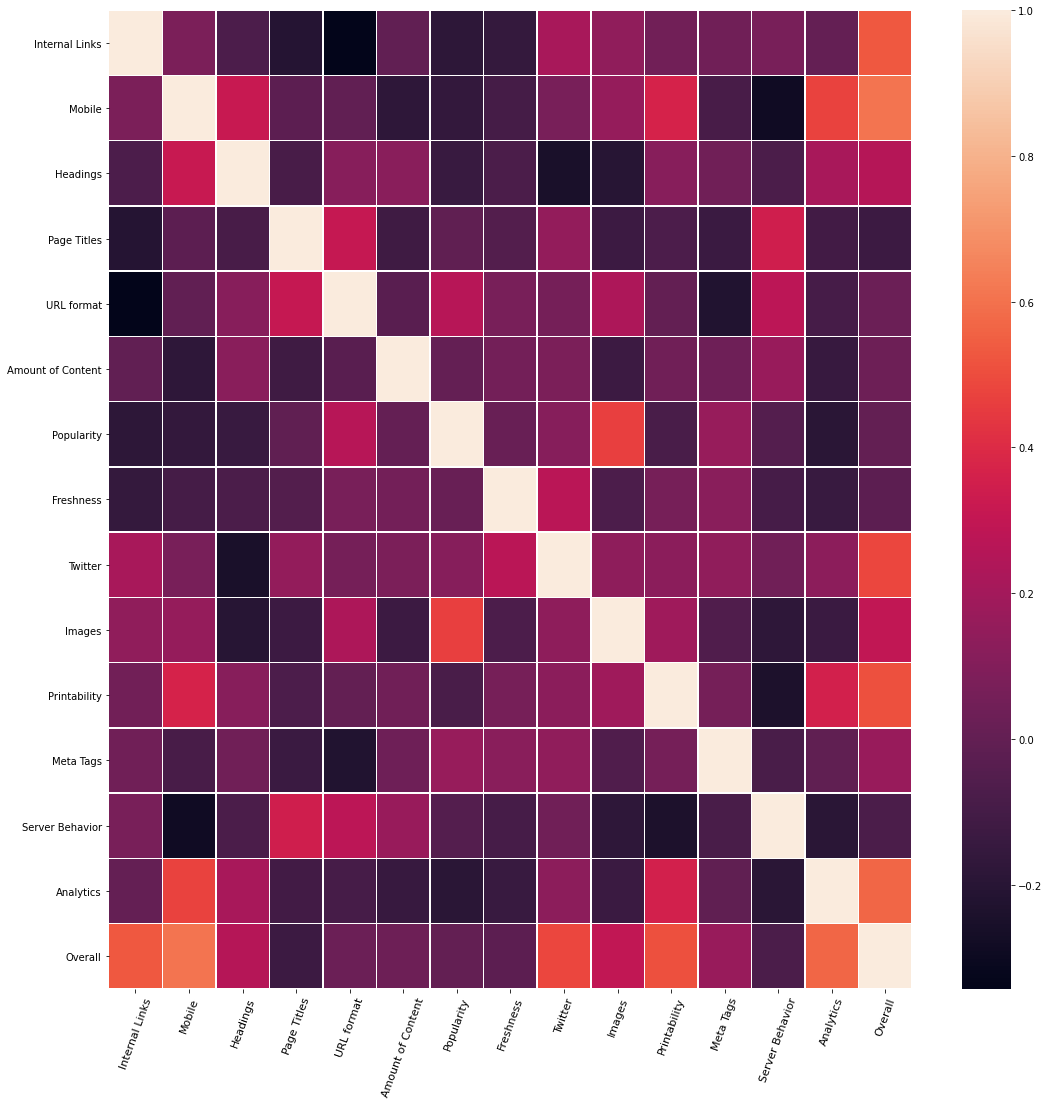

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
sns.heatmap(df.corr(),annot=False, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

In [ ]:
data=refresh_dataset()
y = data.Overall                     
list = ['Overall','Blog']
x = data.drop(list,axis = 1 )
x.head()

,Internal Links,Mobile,Headings,Page Titles,URL format,Amount of Content,Popularity,Freshness,Twitter,Images,Printability,Meta Tags,Server Behavior,Analytics
0,0.7,7.2,9.0,10,10.0,9.8,10.0,10.0,0.0,9.4,0.0,10.0,10.0,0.0
1,9.2,8.6,9.0,10,3.6,9.6,2.9,10.0,10.0,4.7,0.0,10.0,10.0,10.0
2,8.6,10.0,10.0,10,10.0,8.4,7.7,10.0,0.0,9.9,10.0,8.4,9.8,0.0
3,9.3,10.0,10.0,10,10.0,9.1,9.5,10.0,10.0,8.0,10.0,10.0,10.0,0.0
4,4.3,10.0,10.0,10,10.0,9.0,9.8,10.0,0.0,9.8,0.0,10.0,10.0,10.0


In [ ]:
print(y)

0     7.3
1     8.5
2     8.5
3     9.0
4     8.7
     ... 
74    9.6
75    8.7
76    9.4
77    9.5
78    8.4
Name: Overall, Length: 79, dtype: float64


In [ ]:
y.head()

0    7.3
1    8.5
2    8.5
3    9.0
4    8.7
Name: Overall, dtype: float64

In [ ]:
def build_model():
	model = Sequential()
	model.add(Dense(20, input_dim=14, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
model = build_model()


In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold

In [ ]:
init_lr = 1e-4
epochs = 30
batch_size = 32
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def evaluate_model(X,y):
  results = []
  n_inputs = 14
  n_outputs = 1
  cv = RepeatedKFold (n_splits = 25 , n_repeats = 3, random_state = 1)
  for train_ix, test_ix in cv.split(X):
    X_train, X_test = X.values[train_ix], X.values[test_ix]
    y_train, y_test = y.values[train_ix], y.values[test_ix]
    model = build_model()
    model.fit(X_train, y_train, verbose=0, epochs=100)
    mae = model.evaluate(X, y, verbose=0)
    print('>%.3f' % mae)
    results.append(mae)
  return results



In [ ]:
x.head()

,Internal Links,Mobile,Headings,Page Titles,URL format,Amount of Content,Popularity,Freshness,Twitter,Images,Printability,Meta Tags,Server Behavior,Analytics
0,0.7,7.2,9.0,10,10.0,9.8,10.0,10.0,0.0,9.4,0.0,10.0,10.0,0.0
1,9.2,8.6,9.0,10,3.6,9.6,2.9,10.0,10.0,4.7,0.0,10.0,10.0,10.0
2,8.6,10.0,10.0,10,10.0,8.4,7.7,10.0,0.0,9.9,10.0,8.4,9.8,0.0
3,9.3,10.0,10.0,10,10.0,9.1,9.5,10.0,10.0,8.0,10.0,10.0,10.0,0.0
4,4.3,10.0,10.0,10,10.0,9.0,9.8,10.0,0.0,9.8,0.0,10.0,10.0,10.0


In [ ]:
results = evaluate_model(x, y)


>0.072
>0.096
>0.056
>0.085
>0.075
>0.023
>0.083
>0.085
>0.145
>0.095
>0.126
>0.047
>0.065
>0.076
>0.105
>0.071
>0.082
>0.107
>0.075
>0.140
>0.088
>0.063
>0.058
>0.072
>0.104
>0.089
>0.120
>0.115
>0.104
>0.168
>0.103
>0.086
>0.103
>0.075
>0.073
>0.047
>0.038
>0.071
>0.076
>0.109
>0.115
>0.064
>0.102
>0.085
>0.091
>0.082
>0.061
>0.117
>0.081
>0.043
>0.051
>0.051
>0.112
>0.101
>0.080
>0.090
>0.080
>0.075
>0.102
>0.114
>0.065
>0.070
>0.074
>0.058
>0.102
>0.065
>0.064
>0.085
>0.110
>0.064
>0.088
>0.097
>0.110
>0.087
>0.059


In [ ]:
print(x)

    Internal Links  Mobile  Headings  ...  Meta Tags  Server Behavior  Analytics
0              0.7     7.2       9.0  ...       10.0             10.0        0.0
1              9.2     8.6       9.0  ...       10.0             10.0       10.0
2              8.6    10.0      10.0  ...        8.4              9.8        0.0
3              9.3    10.0      10.0  ...       10.0             10.0        0.0
4              4.3    10.0      10.0  ...       10.0             10.0       10.0
..             ...     ...       ...  ...        ...              ...        ...
74             9.6    10.0      10.0  ...       10.0             10.0       10.0
75             2.6    10.0       9.0  ...       10.0              8.0       10.0
76             9.9    10.0       7.9  ...       10.0              9.5       10.0
77            10.0    10.0       9.0  ...        8.4             10.0       10.0
78             9.2     8.6       9.0  ...       10.0             10.0       10.0

[79 rows x 14 columns]


In [ ]:
print(x.shape,y.shape)

(79, 14) (79,)


In [ ]:
results

[0.07159361243247986,
 0.09605135768651962,
 0.05611953139305115,
 0.08531899005174637,
 0.07517386227846146,
 0.022506527602672577,
 0.08269426226615906,
 0.08514997363090515,
 0.14481349289417267,
 0.0951075479388237,
 0.126487135887146,
 0.04717075452208519,
 0.06469810754060745,
 0.0760934054851532,
 0.10530287027359009,
 0.07104212045669556,
 0.0816618874669075,
 0.10693489760160446,
 0.07494055479764938,
 0.13956616818904877,
 0.08761785924434662,
 0.06262654066085815,
 0.058480311185121536,
 0.07171773165464401,
 0.10365665704011917,
 0.08948417007923126,
 0.12019450962543488,
 0.11497362703084946,
 0.10436367243528366,
 0.16797877848148346,
 0.10338576883077621,
 0.086468905210495,
 0.10314774513244629,
 0.07531113922595978,
 0.07304490357637405,
 0.04732801765203476,
 0.03814685717225075,
 0.07052823901176453,
 0.0763765349984169,
 0.10855067521333694,
 0.11479007452726364,
 0.06386221945285797,
 0.10169997066259384,
 0.08470937609672546,
 0.09138696640729904,
 0.0817570984363

In [ ]:


from csv import writer
  
 

  

with open('/content/sample.csv', 'a') as f_object:
  
    
    writer_object = writer(f_object)
  
    
    writer_object.writerow(results)

    f_object.close()

In [ ]:
dataset = pd.read_csv("/content/sample.csv")

In [ ]:
dataset

,0.07159361243247986,0.09605135768651962,0.05611953139305115,0.08531899005174637,0.07517386227846146,0.022506527602672577,0.08269426226615906,0.08514997363090515,0.14481349289417267,0.0951075479388237,0.126487135887146,0.04717075452208519,0.06469810754060745,0.0760934054851532,0.10530287027359009,0.07104212045669556,0.0816618874669075,0.10693489760160446,0.07494055479764938,0.13956616818904877,0.08761785924434662,0.06262654066085815,0.058480311185121536,0.07171773165464401,0.10365665704011917,0.08948417007923126,0.12019450962543488,0.11497362703084946,0.10436367243528366,0.16797877848148346,0.10338576883077621,0.086468905210495,0.10314774513244629,0.07531113922595978,0.07304490357637405,0.04732801765203476,0.03814685717225075,0.07052823901176453,0.0763765349984169,0.10855067521333694,0.11479007452726364,0.06386221945285797,0.10169997066259384,0.08470937609672546,0.09138696640729904,0.08175709843635559,0.06136634573340416,0.11727568507194519,0.08131314814090729,0.04345734044909477,0.05119563266634941,0.050713635981082916,0.1115744486451149,0.1008240357041359,0.07985962182283401,0.0898859053850174,0.0800473615527153,0.07473709434270859,0.1023651584982872,0.11411304771900177,0.06496573239564896,0.06965355575084686,0.07351072877645493,0.057535938918590546,0.10207807272672653,0.0652703121304512,0.06406216323375702,0.08503138273954391,0.1099037230014801,0.06436897814273834,0.08848649263381958,0.09729275107383728,0.10980337858200073,0.0874037891626358,0.05939336493611336


In [ ]:
dataset_tr = dataset.transpose()
dataset_tr

""
0.07159361243247986
0.09605135768651962
0.05611953139305115
0.08531899005174637
0.07517386227846146
...
0.08848649263381958
0.09729275107383728
0.10980337858200073
0.0874037891626358


In [ ]:
dataset_tr.to_csv('file_name.csv', index=True)